In [5]:
!pip install pandas numpy matplotlib seaborn xgboost
!python.exe -m pip install --upgrade pip
!pip install sckit-learn
!pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


Defaulting to user installation because normal site-packages is not writeable


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [7]:
df = pd.read_csv(r'C:\Users\braga\Downloads\AEP_hourly.csv\AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)


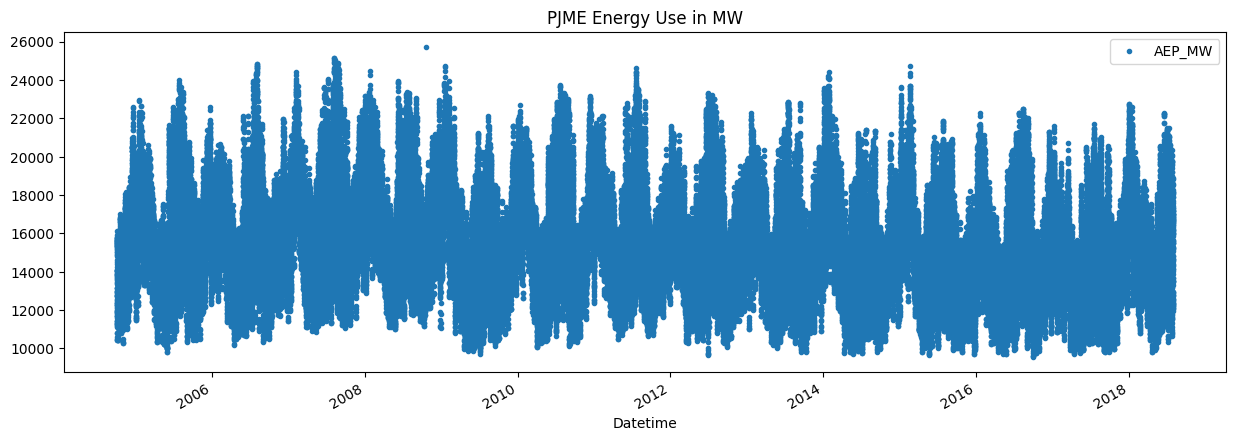

In [8]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

# visualize Train/ Test data

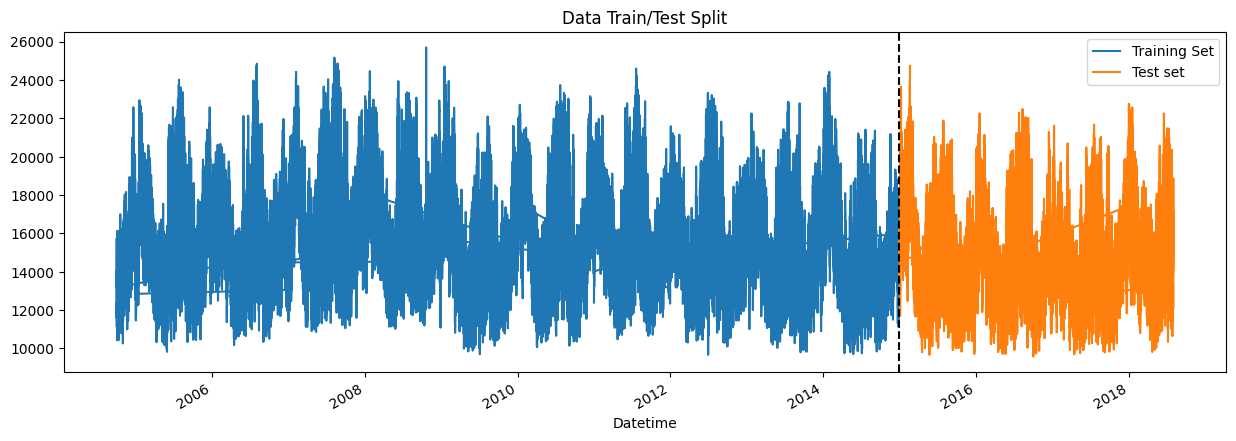

In [9]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']


fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax, label='Training set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test set')
ax.axvline('01-01-2015', color='black',ls='--')
ax.legend(['Training Set', 'Test set'])
plt.show()

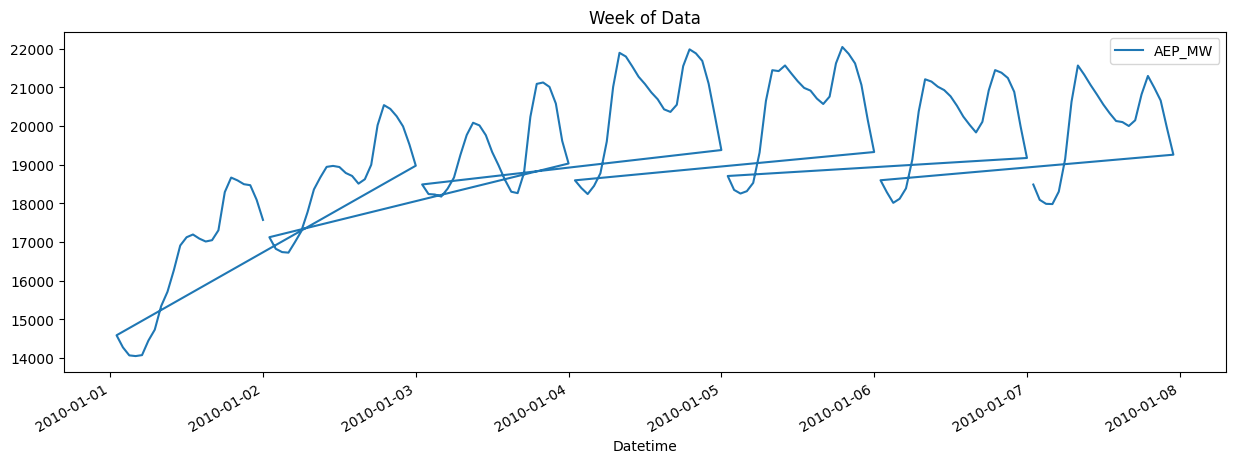

In [10]:
df.loc[(df.index > '01-01-2010') & (df.index <'01-08-2010')] .plot (figsize=(15,5), title='Week of Data')
plt.show()

# Feature creation

In [11]:
def create_features(df):
    # create time series features based on time series index 

    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

# visualize our Feature / Target Relationship

C:\Users\braga\AppData\Local\Temp\ipykernel_15284\2287279702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='AEP_MW', palette="pastel")


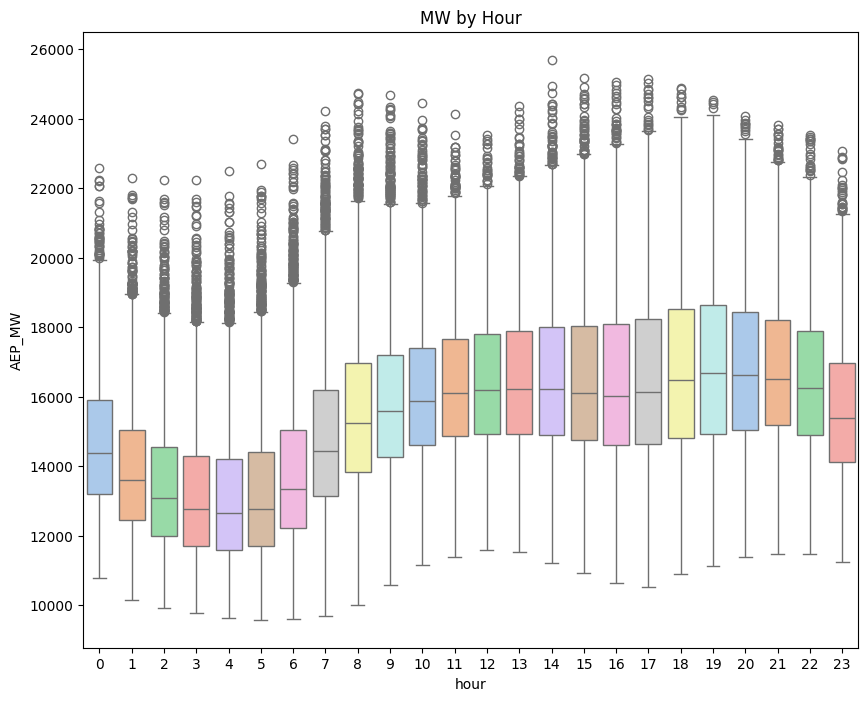

In [12]:
fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour', y='AEP_MW', palette="pastel")
ax.set_title('MW by Hour')
plt.show()

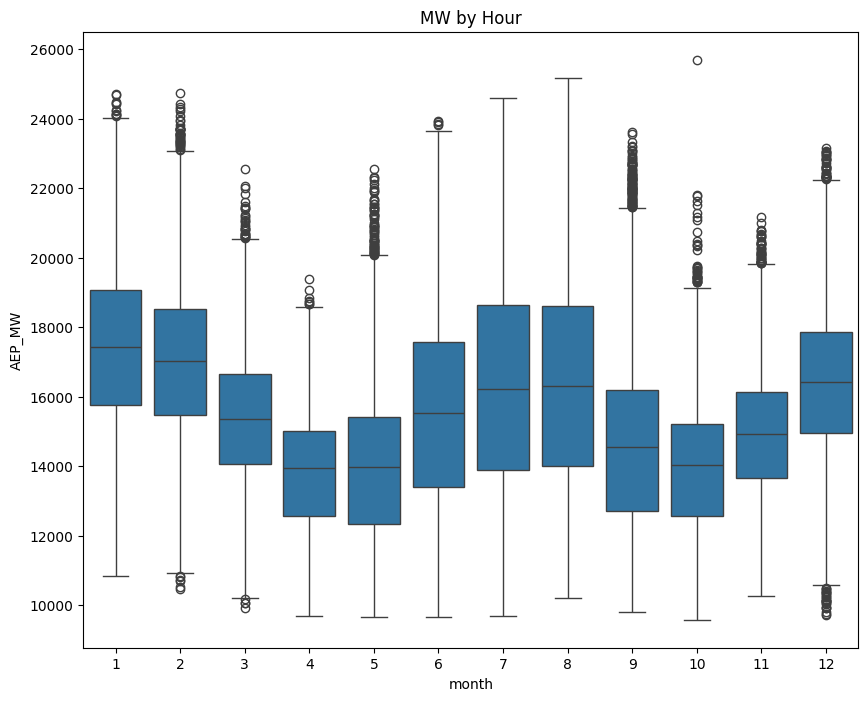

In [13]:
fig, ax=plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='AEP_MW', color= color_pal[0])
ax.set_title('MW by Hour')
plt.show()


# create our model

In [14]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'AEP_MW'
X_train = train[FEATURES]
Y_train = train[TARGET]
X_test = test[FEATURES]
Y_test = test[TARGET]




In [15]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate = 0.001, max_depth=3)
reg.fit(X_train,Y_train,
        eval_set=[(X_train, Y_train), (X_test, Y_test)],
        verbose=200)



[0]	validation_0-rmse:2572.28743	validation_1-rmse:2683.61914
[200]	validation_0-rmse:2379.11231	validation_1-rmse:2514.08815
[400]	validation_0-rmse:2238.60073	validation_1-rmse:2395.04251
[600]	validation_0-rmse:2132.57541	validation_1-rmse:2307.91750
[800]	validation_0-rmse:2053.40940	validation_1-rmse:2245.03285
[999]	validation_0-rmse:1972.79248	validation_1-rmse:2177.50252


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Feature Importance

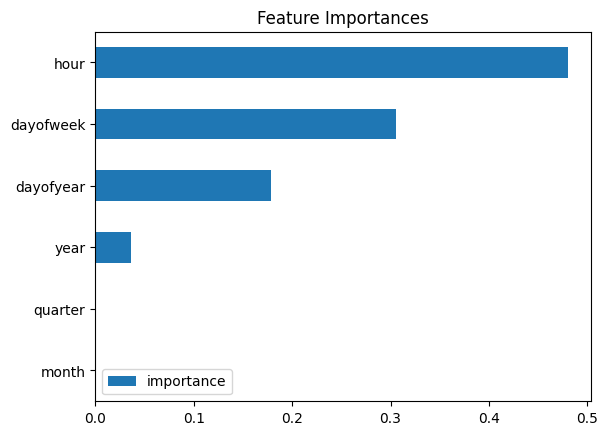

In [16]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title ='Feature Importances')
plt.show()


# Forecast on Test

In [17]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,1,1


In [18]:
test['prediction']=reg.predict(X_test)
df= df.merge(test[['prediction']], how='left', left_index= True, right_index= True)


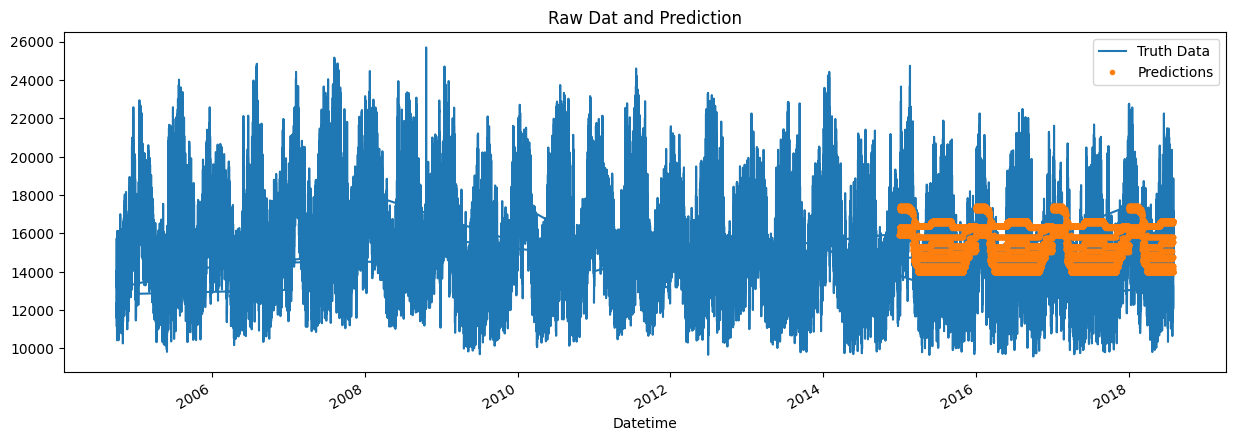

In [19]:
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

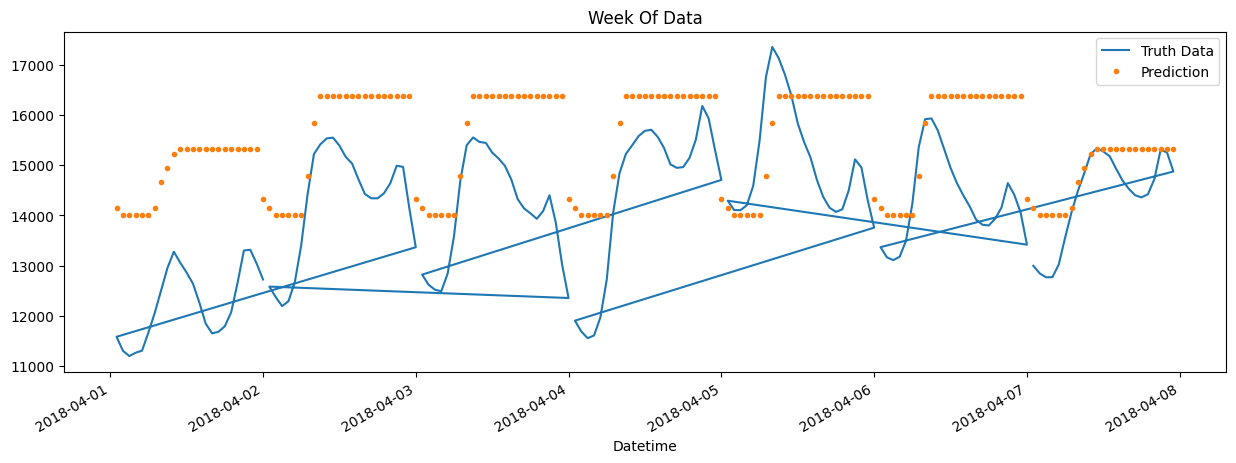

In [20]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

# Score(RMSE)

In [21]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2177.50


# Residual Plot

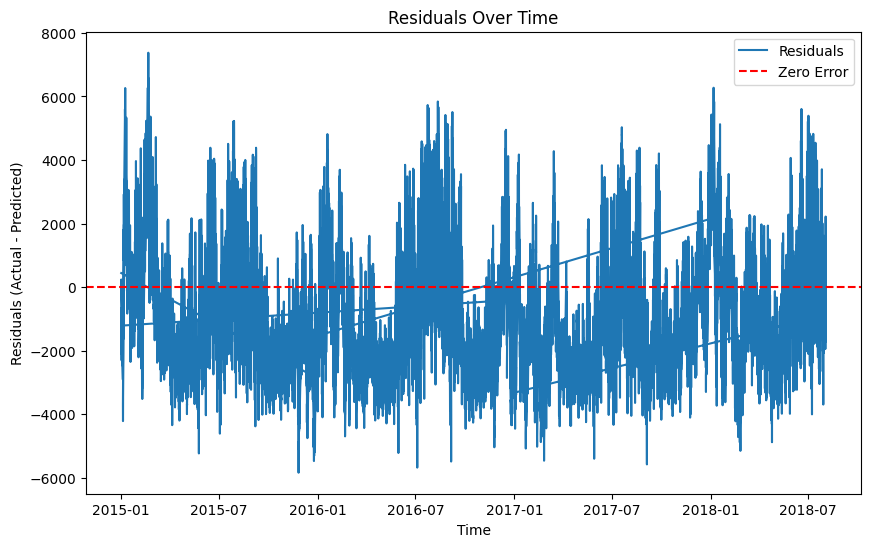

In [22]:

# Calculate residuals
test['residuals'] = test[TARGET] - test['prediction']

# Plot residuals over time
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['residuals'], label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Time')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

# Calculate Error

In [25]:
# Calculate absolute errors
test['absolute_error'] = np.abs(test[TARGET] - test['prediction'])

# Calculate percentage errors
mean_target = test[TARGET].mean()
test['percentage_error'] = (test['absolute_error'] / mean_target) * 100

# Group by date and calculate mean absolute and percentage errors
daily_errors = test.groupby(test.index.date).agg({
    'absolute_error': 'mean',
    'percentage_error': 'mean'
}).sort_values('absolute_error', ascending=False).head(10)

# Display the top 10 days with the highest mean absolute error
print(daily_errors)

            absolute_error  percentage_error
2015-02-19     5375.233805         36.302410
2015-02-20     5176.353353         34.959242
2015-01-08     4944.935140         33.396326
2015-12-25     4908.567790         33.150714
2018-01-06     4657.255046         31.453437
2015-12-24     4530.941243         30.600359
2018-01-05     4232.253499         28.583129
2015-02-16     4205.214600         28.400518
2015-11-26     4122.718791         27.843371
2015-11-27     4075.762004         27.526241


In [26]:
# Calculate the mean percentage error directly
mean_percentage_error = (np.abs(test[TARGET] - test['prediction']).mean() / test[TARGET].mean()) * 100

# Print the result
print(f'Mean Percentage Error: {mean_percentage_error:.2f}%')

Mean Percentage Error: 12.61%
